In [1]:
import pandas as pd


names1880 = pd.read_csv('yob1880.txt', names=['name', 'sex', 'births'])

In [2]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


Total number of births by sex in 1880 year

In [3]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110491
Name: births, dtype: int64

Now adding period of years from 1880 to 2011 in our dataset.

In [4]:
years = range(1880, 2018)
pieces = []

for year in years:
    frame = pd.read_csv('yob%d.txt' % year, names=['name', 'sex', 'births'])
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

In [5]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [6]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [7]:
total_births.tail()

sex,F,M
year,,
2013,1750321,1886989
2014,1781072,1915239
2015,1778883,1909804
2016,1763916,1889052
2017,1711811,1834490


By groupby method:-

In [8]:
data2 = names.groupby(['year', 'sex'])['births']

In [9]:
names_by_year_sex2 = data2.apply(sum).unstack()

In [10]:
names_by_year_sex2.tail()

sex,F,M
year,,
2013,1750321,1886989
2014,1781072,1915239
2015,1778883,1909804
2016,1763916,1889052
2017,1711811,1834490


Let's plot this data:

In [11]:
total_births.plot(title="Total births year by sex")

let's add another column named 'prop' which tells each name relative to the total number of births.

In [12]:
def norm_total(group):
    group['prop'] = group.births/group.births.sum()
    return group

In [13]:
names = names.groupby(['year', 'sex']).apply(norm_total)

In [14]:
names[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


for sanity check if we have created right values for prop or not.

In [15]:
names.groupby(['year', 'sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
            ... 
2003  F      1.0
      M      1.0
2004  F      1.0
      M      1.0
2005  F      1.0
      M      1.0
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
2011  F      1.0
      M      1.0
2012  F      1.0
      M      1.0
2013  F      1.0
      M      1.0
2014  F      1.0
      M      1.0
2015  F      1.0
      M      1.0
2016  F      1.0
    

So every value is adding upto 1, so our prop values are right.

Now let's exctract the top 1000 names from the dataset

In [16]:
def top1000(group):
    return group.sort_values(by='births', ascending=False)

In [17]:
grouped = names.groupby(['year', 'sex'])
top_1000 = grouped.apply(top1000)
top_1000.reset_index(inplace=True, drop=True)

In [18]:
top_1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


### Analyzing Naming Trend

Now we have top 1000 names from the dataset, let's split the dataset into girls and boys sections and proceed further.

In [19]:
boys = top_1000[top_1000['sex'] == 'M']
girls = top_1000[top_1000['sex'] == 'F']

In [20]:
boys.size

3931860

In [21]:
girls.size

5691465

Let's calculate the total number of births in top 1000 babies in terms of year by name.

In [22]:
total_births = top_1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

Now this can plotted for handful of names

In [23]:
subset = total_births[['John', 'Harry', 'Mary', 'Gee']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x01360B30>,
      dtype=object)

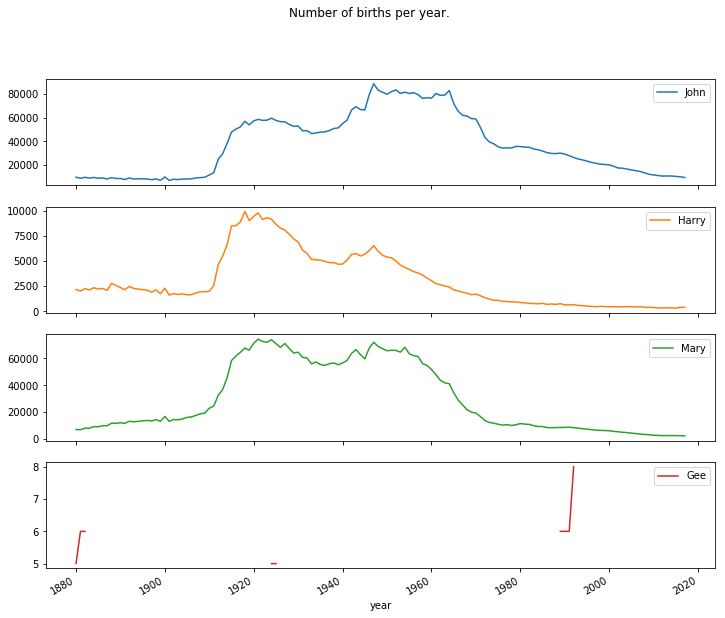

In [24]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of births per year.')

##### Let's check the increase in naming diversity for top 1000 names

In [25]:
table = top_1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

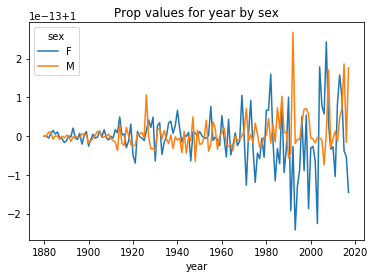

In [26]:
import numpy as np

table.plot(title="Prop values for year by sex")

Now another intresting metric is the number of distinct names, taken in order of popularity from highest to lowest, in the top 50%.

We can do this by taking the `cumsum()` of **prop** and then using the `searchsorted(q)`, where q is quantile value < 1

In [27]:
df = boys[boys['year'] == 2010]

In [28]:
prop_cumsum = df.sort_values(by='prop', ascending=False)['prop'].cumsum()

In [29]:
prop_cumsum.values.searchsorted(0.5)

116

Index starts from zero so we have 117 names in top 50%.

Now we can apply this approach in year/sex combination.

In [30]:
def quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)['prop'].cumsum()
    return group.values.searchsorted(q) + 1

In [31]:
diversity = top_1000.groupby(['year', 'sex']).apply(quantile_count)

In [32]:
diversity = diversity.unstack('sex')

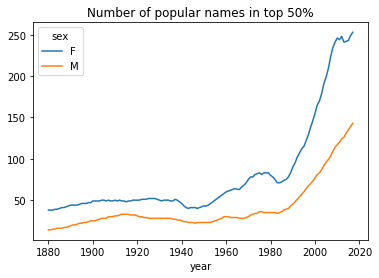

In [33]:
diversity.plot(title="Number of popular names in top 50%")

### The "last letter" revolution

In 2007 scientist found out that in last 100 years, names of baby's last letter has significantly changed.

Let's make an aggregation on this

In [34]:
get_last_letter = lambda x : x[-1]
last_letters = names['name'].map(get_last_letter)

In [35]:
# add a column
last_letters.name = 'last_letter'

In [36]:
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [37]:
subtable = table.reindex(columns = [1910, 2010, 2015], level='year')

In [38]:
subtable.head()

sex                 F                            M                    
year             1910      2010      2015     1910      2010      2015
last_letter                                                           
a            108397.0  676646.0  659755.0    977.0   28859.0   28952.0
b                 NaN     455.0     596.0    411.0   39264.0   29557.0
c                 5.0     955.0    1253.0    482.0   23341.0   23106.0
d              6751.0    2640.0    3251.0  22113.0   44817.0   43717.0
e            133600.0  316665.0  326665.0  28665.0  130228.0  128384.0

In [39]:
subtable.sum()

sex  year
F    1910     396502.0
     2010    1774758.0
     2015    1778883.0
M    1910     194213.0
     2010    1915942.0
     2015    1909804.0
dtype: float64

Next, normalize the table by total births to compute a new table containing proportion of total births for each sex ending in each letter:

In [40]:
letter_prop = subtable / subtable.sum()

Now we can plot for each sex and ending letters:

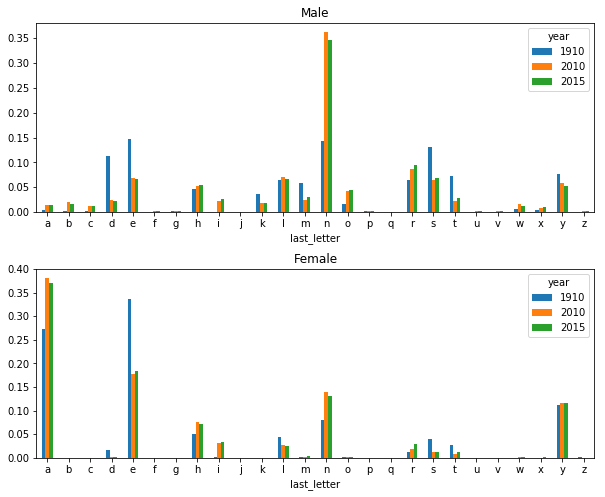

In [41]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

As we can see that in males we have 3 most frequent letters which are n, e, s in descending order.

Let's plot the frequency of time series of these letters:

In [42]:
letter_prop = table/table.sum()

In [43]:
nes_ts = letter_prop.loc[['n', 'e', 's'], 'M'].T

In [44]:
nes_ts.head()

last_letter,n,e,s
year,,,
1880,0.153216,0.122119,0.167009
1881,0.153212,0.123145,0.162483
1882,0.149561,0.128538,0.160433
1883,0.151653,0.126076,0.158105
1884,0.149927,0.127890,0.154751


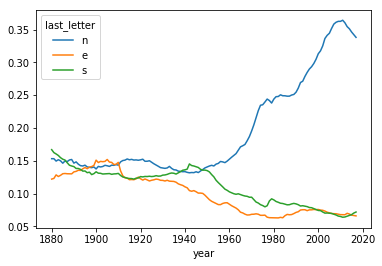

In [45]:
nes_ts.plot()

#### Boy names that became girl names (vice-versa)

In [46]:
all_names = pd.Series(top_1000['name'].unique())

In [47]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [48]:
lesley_like.size

24

So we have 24 names which sounds like lesley.

Now we can see from this data to those names and sum births grouped by name to see the relative frequencies.

In [49]:
filtered = top_1000[top_1000['name'].isin(lesley_like)]

In [50]:
filtered.groupby('name')['births'].sum()

name
Boleslaus        255
Boleslaw         277
Lesle            187
Leslea           349
Leslee          4956
Leslei            52
Lesleigh         474
Lesley         38741
Lesleyann         86
Lesleyanne        80
Lesli           5678
Leslian           27
Lesliann           6
Leslianne         10
Leslie        379163
Leslieann        472
Leslieanne        93
Lesliee            8
Leslly             5
Lesly          14400
Leslyann          16
Leslye          2389
Leslyn           166
Wellesley         17
Name: births, dtype: int64

Now let's aggregate by sex and year and normalize within year:

In [51]:
table = filtered.pivot_table('births', index='year', columns='sex', 
                             aggfunc=sum)

In [52]:
table.head()

sex,F,M
year,,
1880,8,79
1881,11,92
1882,9,128
1883,7,125
1884,15,125


In [53]:
table.sum(1)

year
1880      87
1881     103
1882     137
1883     132
1884     140
1885     132
1886     144
1887     178
1888     198
1889     178
1890     201
1891     192
1892     229
1893     216
1894     259
1895     257
1896     269
1897     261
1898     260
1899     199
1900     315
1901     233
1902     288
1903     268
1904     273
1905     282
1906     299
1907     307
1908     331
1909     338
        ... 
1988    4146
1989    3868
1990    3869
1991    3518
1992    3355
1993    3128
1994    3207
1995    3151
1996    3957
1997    4207
1998    4644
1999    5107
2000    5498
2001    5374
2002    5110
2003    5312
2004    5079
2005    4677
2006    4507
2007    4144
2008    3593
2009    3043
2010    2473
2011    2019
2012    1872
2013    1654
2014    1495
2015    1328
2016    1159
2017    1027
Length: 138, dtype: int64

In [54]:
table = table.div(table.sum(1), axis=0)

In [55]:
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


In [56]:
table.tail()

sex,F,M
year,,
2013,0.978235,0.021765
2014,0.959197,0.040803
2015,0.954819,0.045181
2016,0.954271,0.045729
2017,0.956183,0.043817


let's finally plot this:

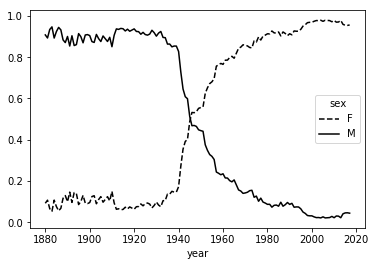

In [57]:
table.plot(style={'M': 'k-', 'F': 'k--'})

# The End :)